# DataViz Project

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv("C:/Users/adrie/Documents/ENSIMAG/Visualisation de l'Information/Projet d3.js/Fichier CSV/WorldCountries.csv"
                  , sep=",", header=0, decimal=",")
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [37]:
#Data information (NaN values, Dtype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [38]:
#Drop NaN values
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    float64
 5   Coastline (coast/area ratio)        179 non-null    float64
 6   Net migration                       179 non-null    float64
 7   Infant mortality (per 1000 births)  179 non-null    float64
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    float64
 10  Phones (per 1000)                   179 non-null    float64
 11  Arable (%)                          179 non-n

In [39]:
#Delete space over string
for col in ['Country','Region']:
    data[col] = data[col].str.strip()

In [40]:
data['Region'].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'OCEANIA',
       'WESTERN EUROPE', 'NEAR EAST', 'SUB-SAHARAN AFRICA',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [41]:
#Rename region
def region(Region):
    if Region == "OCEANIA":
        return "Oceania"
    elif Region == "NORTHERN AFRICA":
        return "Africa"
    elif Region == "SUB-SAHARAN AFRICA":
        return "Africa"
    elif Region == "BALTCIS":
        return "Europe"
    elif Region == "EASTERN EUROPE":
        return "Europe"
    elif Region == "WESTERN EUROPE":
        return "Europe"
    elif Region == "LATIN AMER. & CARIB":
        return "Americas"
    elif Region == "NORTHERN AMERICA":
        return "Americas"
    else : 
        return "Asia"

In [42]:
data['Region'] = data['Region'].map(region)
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,Asia,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,Europe,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,Africa,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,Americas,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,Americas,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


In [43]:
#Check rename
data['Region'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [44]:
#Merge data with ISO norm
code = pd.read_csv("C:/Users/adrie/Documents/ENSIMAG/Visualisation de l'Information/Projet d3.js/Fichier CSV/CountriesCode.csv"
                  , sep=",", header=0, usecols=["Country","Alpha-3 code"])
code.head()

,Country,Alpha-3 code
0,Afghanistan,"""AFG"""
1,Albania,"""ALB"""
2,Algeria,"""DZA"""
3,American Samoa,"""ASM"""
4,Andorra,"""AND"""


In [45]:
#Remove double quotes
code['Alpha-3 code'] = code['Alpha-3 code'].str.replace('"',"").str.strip()
code['Alpha-3 code'].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA', 'ATG',
       'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH',
       'BWA', 'BVT', 'BRA', 'IOT', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR',
       'CCK', 'COL', 'COM', 'COG', 'COD', 'COK', 'CRI', 'CIV', 'HRV',
       'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
       'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN',
       'FRA', 'GUF', 'PYF', 'ATF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA',
       'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN',
       'GNB', 'GUY', 'HTI', 'HMD', 'VAT', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'KWT',
       'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU',
       'LUX', 'MAC',

In [46]:
data = data.merge(code, how='inner', on='Country')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             160 non-null    object 
 1   Region                              160 non-null    object 
 2   Population                          160 non-null    int64  
 3   Area (sq. mi.)                      160 non-null    int64  
 4   Pop. Density (per sq. mi.)          160 non-null    float64
 5   Coastline (coast/area ratio)        160 non-null    float64
 6   Net migration                       160 non-null    float64
 7   Infant mortality (per 1000 births)  160 non-null    float64
 8   GDP ($ per capita)                  160 non-null    float64
 9   Literacy (%)                        160 non-null    float64
 10  Phones (per 1000)                   160 non-null    float64
 11  Arable (%)                          160 non-n

In [47]:
#Remove space, $ and - from header
list_remove = [" ", "$", "-"]
for i in list_remove:
    data.rename(columns = lambda x: x.replace(i,""), inplace=True)
data.columns

Index(['Country', 'Region', 'Population', 'Area(sq.mi.)',
       'Pop.Density(persq.mi.)', 'Coastline(coast/arearatio)', 'Netmigration',
       'Infantmortality(per1000births)', 'GDP(percapita)', 'Literacy(%)',
       'Phones(per1000)', 'Arable(%)', 'Crops(%)', 'Other(%)', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service',
       'Alpha3code'],
      dtype='object')

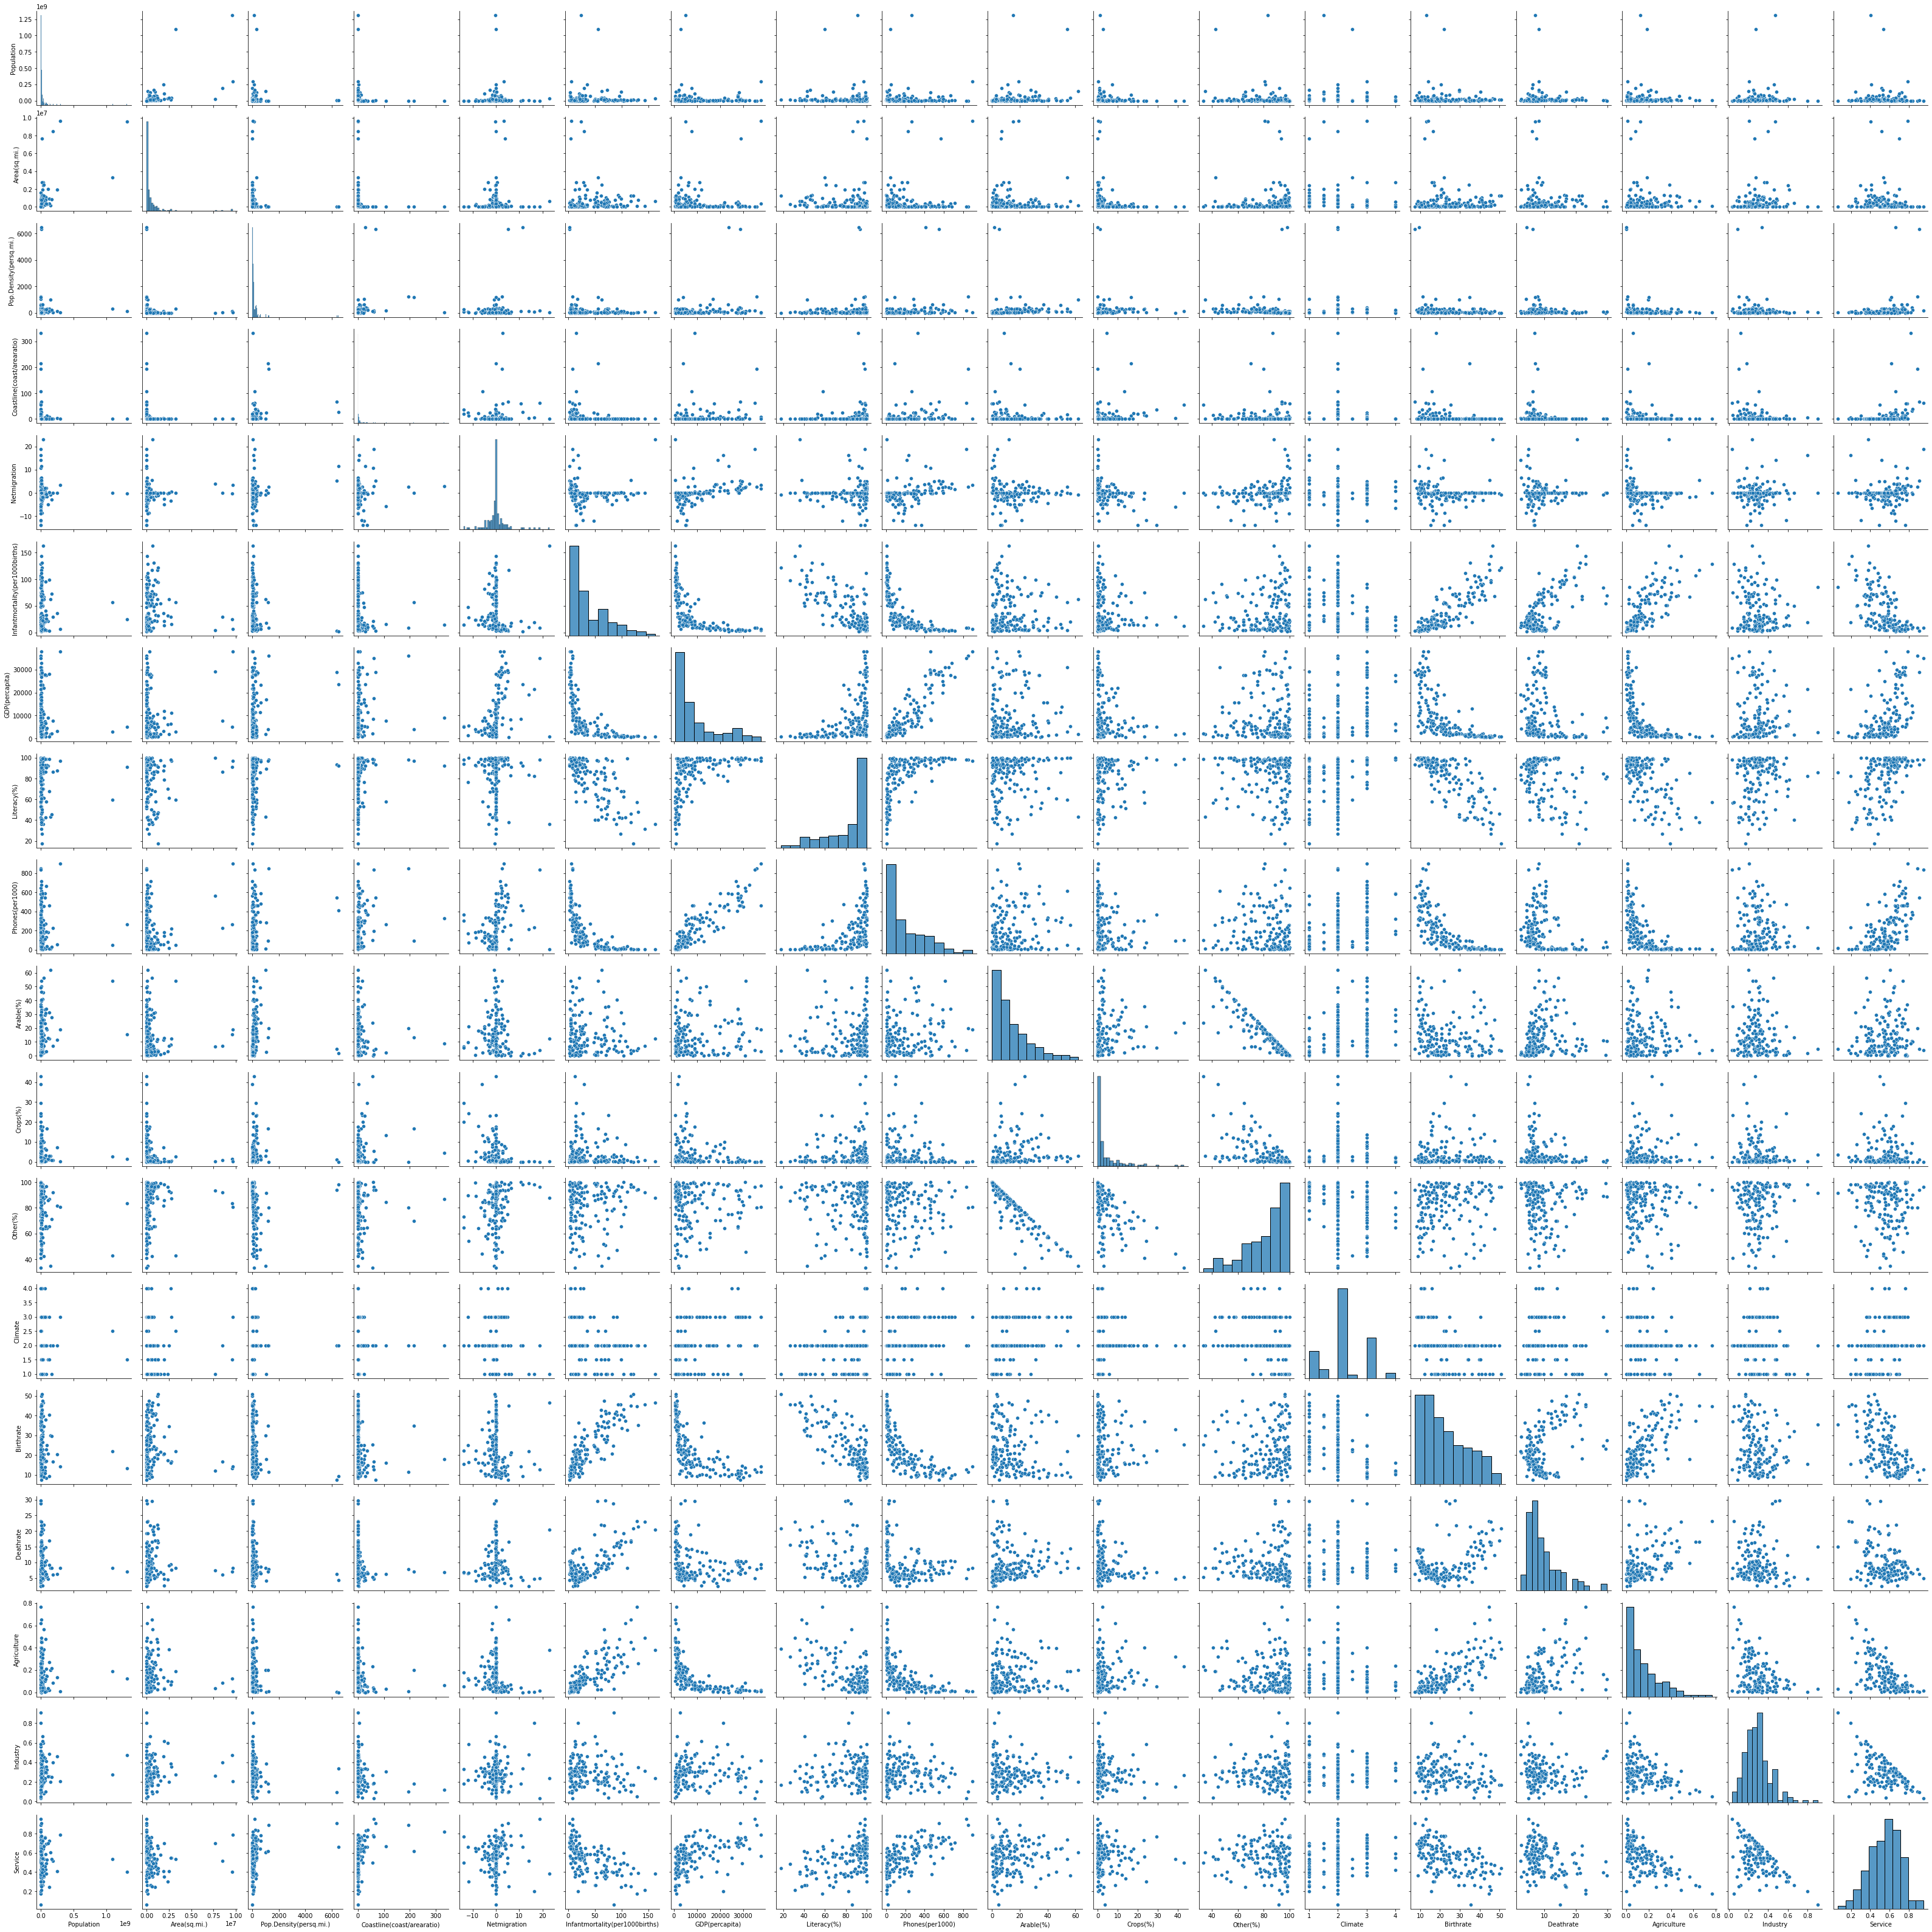

In [49]:
sns.pairplot(data)

<AxesSubplot:>

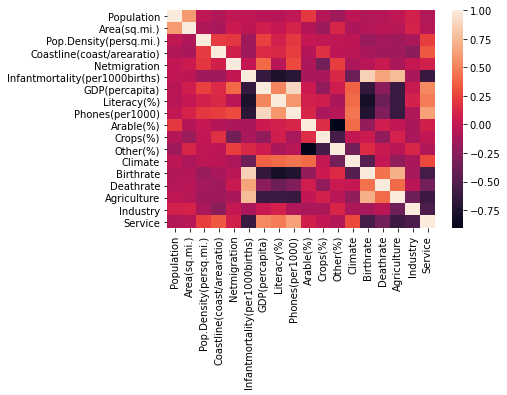

In [50]:
#Correlation between data
sns.heatmap(data.corr())

In [51]:
#Data for spider chart (put % in <script>)
data.groupby('Region').agg({'Agriculture' : 'mean',
                            'Industry' : 'mean',
                            'Service' : 'mean'}).reset_index()

,Region,Agriculture,Industry,Service
0,Africa,0.273302,0.278860,0.448023
1,Americas,0.097333,0.255051,0.645256
2,Asia,0.141273,0.356250,0.502432
3,Europe,0.046435,0.293609,0.659913
4,Oceania,0.153364,0.233818,0.611909


In [52]:
#Data for word cloud
data.groupby('Region').agg({'Area(sq.mi.)' : 'sum'}).reset_index()
#Africa size: 60
#Americas size: 90
#Asia size: 80
#Europe size: 10
#Oceania size: 20

,Region,Area(sq.mi.)
0,Africa,22047960
1,Americas,30153190
2,Asia,30076827
3,Europe,4265382
4,Oceania,8488071


In [53]:
#CSV export 
data.to_csv("WordCountriesVF.csv", index=False)